In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from PIL import Image
import pandas as pd

In [2]:
import os
os.environ['AWS_PROFILE'] = 'default'

In [3]:
conf = (SparkConf()
           .setMaster('local[*]')
           .set('spark.jars.packages',
                'com.amazonaws:aws-java-sdk:1.11.563,org.apache.hadoop:hadoop-aws:3.2.2')
           .set('spark.executor.extraJavaOptions',
                '-Dcom.amazonaws.services.s3.enableV4=true')
           .set('spark.driver.extraJavaOptions',
                '-Dcom.amazonaws.services.s3.enableV4=true')
           .set('fs.s3a.aws.credentials.provider',
                'com.amazonaws.auth.profile.ProfileCredentialsProvider,'
                'org.apache.hadoop.fs.s3a.AnonymousAWSCredentialsProvider'))
sc = SparkContext(conf=conf)

:: loading settings :: url = jar:file:/usr/local/spark-3.1.2-bin-hadoop3.2/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/msds2022/mguevara/.ivy2/cache
The jars for the packages stored in: /home/msds2022/mguevara/.ivy2/jars
com.amazonaws#aws-java-sdk added as a dependency
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-e87b9851-0bd5-4d2b-aa40-2af135f820a3;1.0
	confs: [default]
	found com.amazonaws#aws-java-sdk;1.11.563 in central
	found com.amazonaws#aws-java-sdk-ioteventsdata;1.11.563 in central
	found com.amazonaws#aws-java-sdk-core;1.11.563 in central
	found commons-logging#commons-logging;1.1.3 in central
	found org.apache.httpcomponents#httpclient;4.5.5 in central
	found org.apache.httpcomponents#httpcore;4.4.9 in central
	found commons-codec#commons-codec;1.10 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found com.fasterxml.jackson.core#jackson-databind;2.6.7.2 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.6.0 in central
	found com.fasterxml.jackson.core#jacks

	found com.amazonaws#aws-java-sdk-datapipeline;1.11.563 in central
	found com.amazonaws#aws-java-sdk-elasticloadbalancing;1.11.563 in central
	found com.amazonaws#aws-java-sdk-elasticloadbalancingv2;1.11.563 in central
	found com.amazonaws#aws-java-sdk-emr;1.11.563 in central
	found com.amazonaws#aws-java-sdk-elasticache;1.11.563 in central
	found com.amazonaws#aws-java-sdk-elastictranscoder;1.11.563 in central
	found com.amazonaws#aws-java-sdk-ec2;1.11.563 in central
	found com.amazonaws#aws-java-sdk-dynamodb;1.11.563 in central
	found com.amazonaws#aws-java-sdk-budgets;1.11.563 in central
	found com.amazonaws#aws-java-sdk-cloudtrail;1.11.563 in central
	found com.amazonaws#aws-java-sdk-cloudwatch;1.11.563 in central
	found com.amazonaws#aws-java-sdk-logs;1.11.563 in central
	found com.amazonaws#aws-java-sdk-events;1.11.563 in central
	found com.amazonaws#aws-java-sdk-cognitoidentity;1.11.563 in central
	found com.amazonaws#aws-java-sdk-cognitosync;1.11.563 in central
	found com.amazo

22/03/08 13:09:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
spark = SparkSession(sc)

In [5]:
!ls /mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/00000?_?_00000?_*.jpg

/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_1_000001_MALE_25.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_2_000001_MALE_25.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_3_000001_MALE_25.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_4_000001_MALE_25.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_1_000002_MALE_23.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_2_000002_MALE_23.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_3_000002_MALE_23.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_4_000002_MALE_23.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000003_1_000003_FEMALE_22.jpg
/mnt/processed/private/msds2022/cpt11/BDCC/P

In [9]:
df = pd.read_csv('df_partial.csv')

In [11]:
df['jojie'] = df['name'].str[35:]

In [13]:
df['jojie'] = '/mnt/processed/private/msds2022/cpt11/BDCC/Project' + df['jojie']

In [22]:
df['file'] = df['name'].str[63:]

In [25]:
jojie = df['jojie'].tolist()
file = df['file'].tolist()

In [26]:
jojie

['/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_1_000001_MALE_25.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_4_000001_MALE_25.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_1_000002_MALE_23.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_2_000002_MALE_23.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_3_000002_MALE_23.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000002_4_000002_MALE_23.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000003_1_000003_FEMALE_22.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000003_3_000003_FEMALE_22.jpg',
 '/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000004_2_000004_FEMALE_25.jpg',
 '/m

In [27]:
file

['000001_1_000001_MALE_25.jpg',
 '000001_4_000001_MALE_25.jpg',
 '000002_1_000002_MALE_23.jpg',
 '000002_2_000002_MALE_23.jpg',
 '000002_3_000002_MALE_23.jpg',
 '000002_4_000002_MALE_23.jpg',
 '000003_1_000003_FEMALE_22.jpg',
 '000003_3_000003_FEMALE_22.jpg',
 '000004_2_000004_FEMALE_25.jpg',
 '000005_4_000005_MALE_67.jpg',
 '000006_1_000006_MALE_28.jpg',
 '000006_4_000006_MALE_28.jpg',
 '000007_2_000007_MALE_44.jpg',
 '000007_3_000007_MALE_44.jpg',
 '000007_4_000007_MALE_44.jpg',
 '000008_1_000008_MALE_30.jpg',
 '000008_3_000008_MALE_30.jpg',
 '000009_1_000009_MALE_23.jpg']

In [31]:
im1 = Image.open(r'/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_1_000001_MALE_25.jpg')
im1.save(r'(/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/png/)000001_1_000001_MALE_25.png')

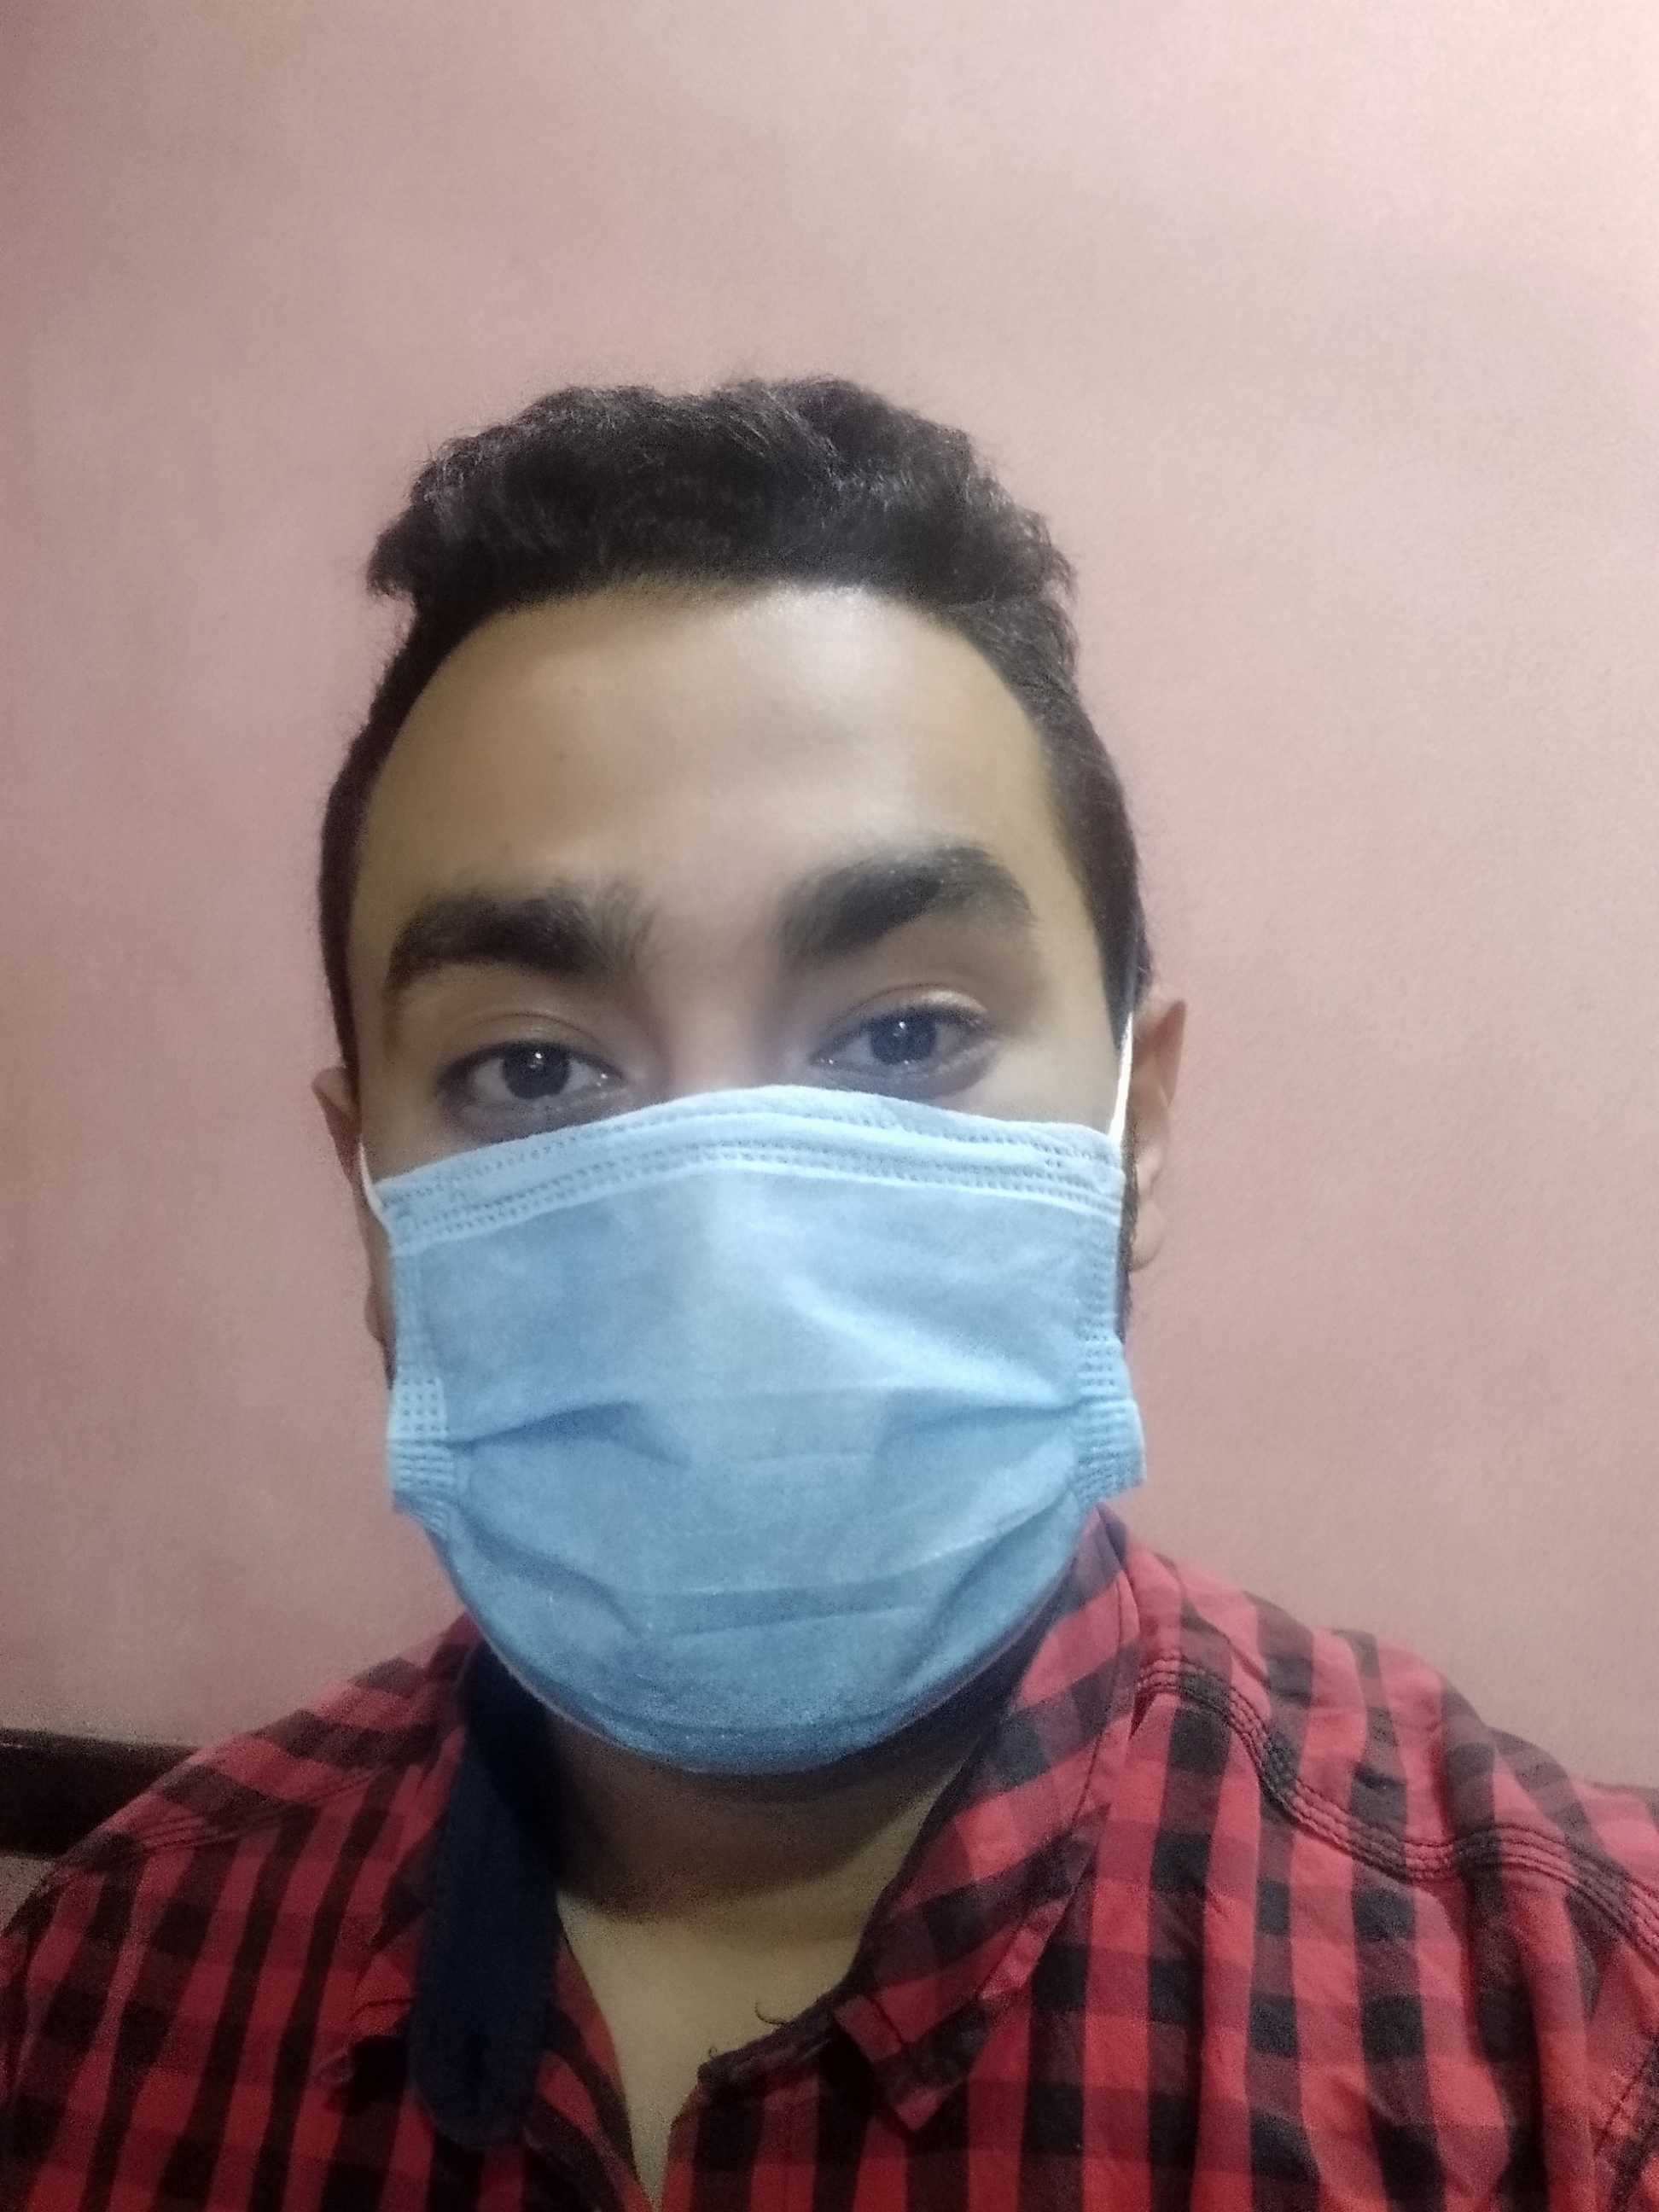

In [39]:
png1 = Image.open(r'/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/png/000001_1_000001_MALE_25.png')
png1.show()

In [34]:
!rm /mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/000001_1_000001_MALE_25.png

In [38]:
for i, j in zip(jojie, file):
    im1 = Image.open(i).resize([128,128])
    im1.save('/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/png/' + j)

In [14]:
# Jojie
from os import listdir
from PIL import Image
    
for filename in listdir('/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/'):
#     print(filename)
    if ~filename.endswith('.png'):
        try:
            img = Image.open('/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/'+filename) # open the image file
            img.verify() # verify that it is, in fact an imag
        except:
            print('Bad file:', filename) # print out the names of corrupt files

Bad file: 000030_1_000030_NONE_29.jpg
Bad file: 007790_1_005591_NONE_27.jpg


In [18]:
# S3
from os import listdir
from PIL import Image
    
for filename in listdir('s3a://medical-masks-bdcc/'):
#     print(filename)
    if ~filename.endswith('.png'):
        try:
            img = Image.open('s3a://medical-masks-bdcc/'+filename) # open the image file
            img.verify() # verify that it is, in fact an imag
        except:
            print('Bad file:', filename) # print out the names of corrupt files

FileNotFoundError: [Errno 2] No such file or directory: 's3a://medical-masks-bdcc/'

In [8]:
from glob import glob
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

In [11]:
# Check pictures
path = (Path("/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/").rglob("*.jpg") 
        + Path("/mnt/processed/private/msds2022/cpt11/BDCC/Project/medical-masks-part1/images/").rglob("*.png"))
for img_p in path:
    print(img_p)
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

TypeError: unsupported operand type(s) for +: 'generator' and 'generator'